# 5. Iterative Computation: Exercise Solutions

$$ % Latex macros
\newcommand{\mat}[1]{\begin{pmatrix} #1 \end{pmatrix}}
\newcommand{\p}[2]{\frac{\partial #1}{\partial #2}}
\newcommand{\b}[1]{\boldsymbol{#1}}
\newcommand{\w}{\boldsymbol{w}}
\newcommand{\x}{\boldsymbol{x}}
\newcommand{\y}{\boldsymbol{y}}
$$

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

## 1. Newton's method in n dimension
Newton's method can be generalized for $n$ dimensional vector $x \in \Re^n$ and $n$ dimensional function $f(x)={\bf0} \in \Re^n$ as
$$ x_{k+1} = x_k - J(x_k)^{-1}f(x_k) $$
where $J(x)$ is the *Jacobian matrix*
$$ J(x) = \mat{\p{f_1}{x_1} & \cdots & \p{f_1}{x_n}\\
    \vdots & & \vdots\\
    \p{f_n}{x_1} & \cdots & \p{f_n}{x_n}} $$

1) Define a function that computes
$$ f(x) = 
    \left(\begin{array}{c} a_0 + a_1 x_1^2 + a_2 x_2^2\\
    b_0 + b_1 x_1 + b_2 x_2\end{array}\right)
$$
and its Jacobian.

In [2]:
def f(x, a, b, deriv=True):
    """y[0] = a[0] + a[1]*x[0]**2 + a[2]*x[1]**2\\
    y[1] = b[0] + b[1]*x[0] + b[2]*x[1]
    also return the Jacobian if derive==True"""
    y0 = a[0] + a[1]*x[0]**2 + a[2]*x[1]**2 
    y1 = b[0] + b[1]*x[0] + b[2]*x[1]
    if deriv:
        J = [[2*a[1]*x[0], 2*a[2]*x[1]],
            [b[1], b[2]]]
        return np.array([y0, y1]), np.array(J)
    else:
        return np.array([y0, y1])

2) Consider the case of $a = [-1, 1, 1]$ and $b = [-1, 1, 2]$ and visualize parabollic and linear surfaces.

In [3]:
a = [-1, 1, 1]
b = [-1, 1, 2]

In [4]:
f([1,1],a,b)

(array([1, 2]),
 array([[2, 2],
        [1, 2]]))

In [5]:
x = np.linspace(-2, 2, 25)
y = np.linspace(-2, 2, 25)
X, Y = np.meshgrid(x, y)

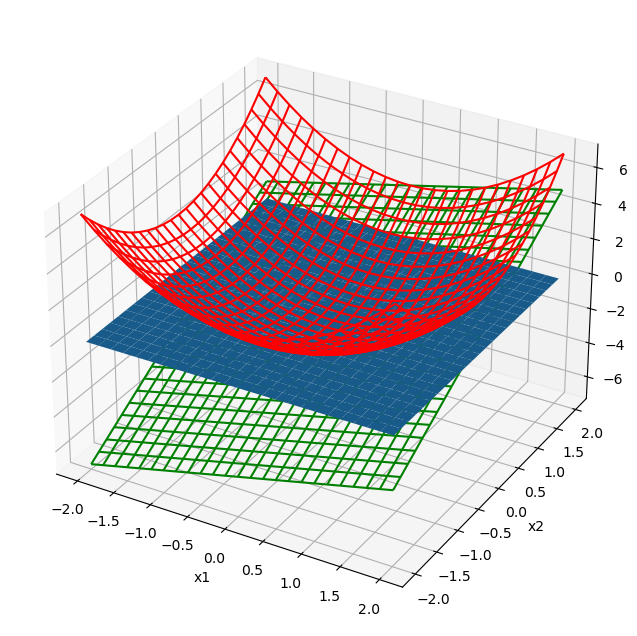

In [6]:
XY = np.array([X,Y])  # (2,25,25) tensor
Z = f(XY, a, b, deriv=False)
ax = plt.figure(figsize=(8,8)).add_subplot(projection='3d')
ax.plot_wireframe(X, Y, Z[0], color='r')
ax.plot_wireframe(X, Y, Z[1], color='g')
ax.plot_surface(X, Y, X*0)
plt.xlabel('x1'); plt.ylabel('x2');

3) Implement Newton's method for vectors.

In [7]:
def newton(f, x0, *args, target=1e-6, maxstep=20):
    """Newton's method. 
        f: should also return Jacobian matrix
        x0: initial guess
        *args: parameter for f(x,*args)
        target: accuracy target"""
    n = len(x0)  # dimension
    x = np.zeros((maxstep+1, n))
    y = np.zeros((maxstep, n))
    x[0] = x0
    for i in range(maxstep):
        y[i], J = f(x[i], *args)
        if sum(abs(y[i])) < target:
            break  # converged!
        x[i+1] = x[i] - np.linalg.inv(J)@y[i]
    else:
        print('did not coverge in', maxstep, 'steps.')
    return x[:i+1], y[:i+1]

4) Test how it works from different initial guesses.

In [8]:
newton(f, [0,1], a, b)

(array([[ 0.        ,  1.        ],
        [-1.        ,  1.        ],
        [-0.66666667,  0.83333333],
        [-0.6025641 ,  0.80128205],
        [-0.6000041 ,  0.80000205],
        [-0.6       ,  0.8       ]]),
 array([[ 0.00000000e+00,  1.00000000e+00],
        [ 1.00000000e+00,  0.00000000e+00],
        [ 1.38888889e-01,  2.22044605e-16],
        [ 5.13642341e-03, -2.22044605e-16],
        [ 8.19204194e-06,  0.00000000e+00],
        [ 2.09714468e-11,  0.00000000e+00]]))

In [9]:
newton(f, [1,1], a, b)

(array([[ 1.00000000e+00,  1.00000000e+00],
        [ 2.00000000e+00, -5.00000000e-01],
        [ 1.27777778e+00, -1.38888889e-01],
        [ 1.03579611e+00, -1.78980527e-02],
        [ 1.00076655e+00, -3.83275644e-04],
        [ 1.00000037e+00, -1.83449494e-07]]),
 array([[ 1.00000000e+00,  2.00000000e+00],
        [ 3.25000000e+00,  0.00000000e+00],
        [ 6.52006173e-01, -1.11022302e-16],
        [ 7.31939122e-02, -1.11022302e-16],
        [ 1.53383708e-03,  6.93889390e-17],
        [ 7.33798146e-07,  3.19839641e-17]]))

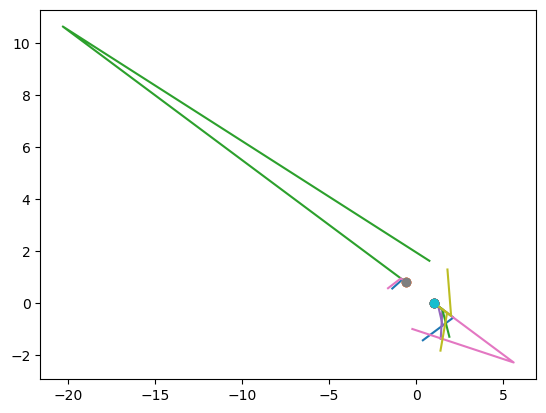

In [10]:
for i in range(10):
    x0 = np.random.uniform(-2, 2, size=2)
    x, y = newton(f, x0, a, b)
    plt.plot(x[:,0], x[:,1])
    plt.plot(x[-1,0], x[-1,1], 'o')

## 2. Bifurcation and Chaos
A value of $x_k$ that stays unchanged after applying a map $f$ to it (i.e. $x_k = f(x_k) = x_{k+1}$) is called a "fixed point" of $f$. 

Let us consider the logistic map
$$ x_{k+1} = a x_k(1 - x_k) $$

1) Plot $x_{k+1}=ax_k(1-x_k)$ along with $x_{k+1}=x_k$ for $a=0.5, 2, 3.3$.

What are the fixed points of these maps?

In [11]:
def logistic(x, a):
    """logistic map: f(x) = a*x*(1-x)"""
    return a*x*(1 - x)

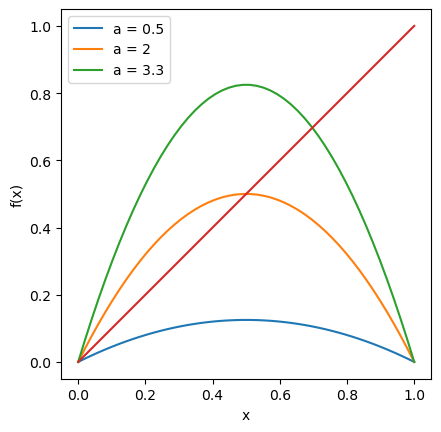

In [12]:
x = np.linspace(0, 1, 50)
# plot with different levels of a
A = [0.5, 2, 3.3]
leg = []
for a in A:
    y = logistic(x, a)
    plt.plot(x, y)
    leg.append('a = {}'.format(a))
plt.legend(leg)
plt.plot([0,1], [0,1])  # x=f(x) line
plt.xlabel('x'); plt.ylabel('f(x)')
plt.axis('square');

From $ x = a x(1 - x) $, we have $ x(a - 1 - ax) = 0 $, so the fixed points are
$$ x = 0, \frac{a-1}{a} \in [0, 1].$$
and the derivative $f'(x)=a(1 - 2x)$ are
$$ x = a, 2-a.$$

In [13]:
def logistic_fp(a):
    """fixed points and derivatives"""
    x = (a-1)/a
    if x>0 and x<1:
        return [0, a], [x, 2-a]
    else:
        return [0, a]

In [14]:
for a in A:
    print(logistic_fp(a))

[0, 0.5]
([0, 2], [0.5, 0])
([0, 3.3], [0.6969696969696969, -1.2999999999999998])


2) A fixed point is said to be "stable" when nearby values of $x_k$ also converge to the fixed point after applying $f$ many times; it's said to be "unstable" when nearby values of $x_k$ diverge from it. 

Draw "cobweb plots" on top of each of the previous plots to visualize trajectories. 
Try several different initial values of $x_k$.

Are the fixed points you found stable or unstable?

How is the stability related to the slope (derivative) of $f(x_k)=ax_k(1-x_k)$ at the fixed point?

In [15]:
def iterate(f, x0, a, steps=100):
    """x0: initial value
        a: parameter to f(x,a)"""
    x = np.zeros(steps+1)
    x[0] = x0
    for k in range(steps):
        x[k+1] = f(x[k], a)
    return x

In [16]:
def cobsplot(x):
    """cobsplot of trajectory x"""
    plt.plot([0,1], [0,1])  # x=f(x) line
    x2 = np.repeat(x, 2)  # duplicate items
    plt.plot(x2[:-1], x2[1:], lw=0.5) # (x0,x1), (x1,x1), (x1,x2),...
    plt.xlabel('$x_k$'); plt.ylabel('$x_{k+1}$');
    plt.axis('square');

* For $a=0.5$, the only fixed point $x=0$ is stable.

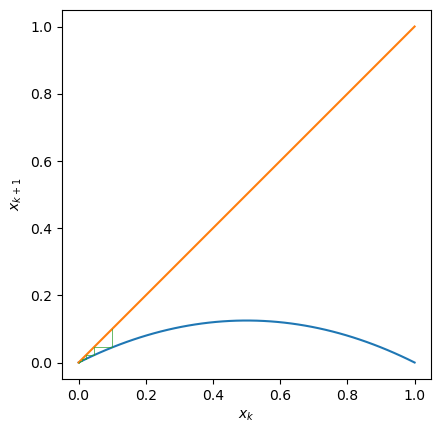

In [17]:
x = np.linspace(0, 1, 50)
a = 0.5
y = logistic(x, a)
plt.plot(x, y)  # plot the map
xt = iterate(logistic, 0.1, a, 200)
cobsplot(xt)  # plot the trajectory

* For $a=2$, the fixed point at $x=0$ is unstable and $x=0.5$ is stable.

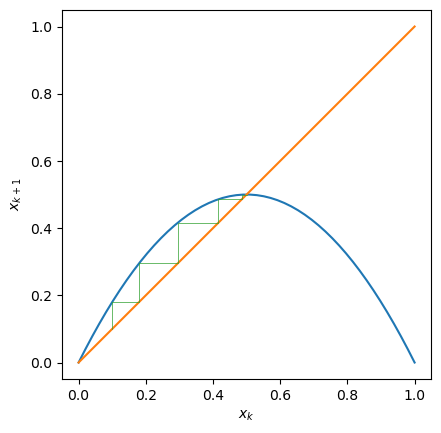

In [18]:
a = 2
y = logistic(x, a)
plt.plot(x, y)  # plot the map
xt = iterate(logistic, 0.1, a, 200)
cobsplot(xt)  # plot the trajectory

* For $a=3.3$, the fixed point at $x=0$ is unstable and $x\simeq0.7$ is also unstable.

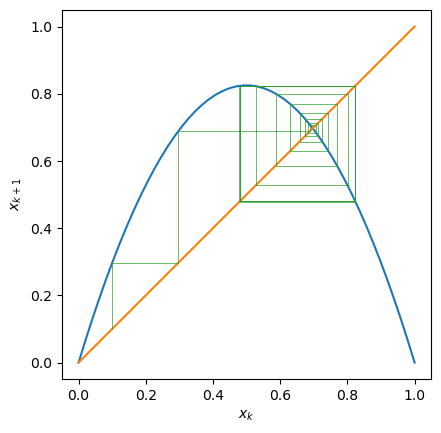

In [19]:
a = 3.3
y = logistic(x, a)
plt.plot(x, y)  # plot the map
xt = iterate(logistic, 0.1, a, 200)
cobsplot(xt)  # plot the trajectory

The fixed point is stable if the gradient at the fixped point is $|f'(x)|<1$.

3: optional) A *bifurcation diagram* is a plot of trajectories versus a parameter.  
draw the bifurcation diagram for parameter $a$ $(1 \le a \le 4)$, like below:  
![bifurcation](figures/bifurcation.png)

Hint:
* Use the `logistic()` and `iterate()` functions from the previous lecture.
* For each value of $a$, show the trajectory (i.e., the values that $x_k$ took over some iterations) of the map after an initial transient. 
* Since $x_k$ is 1D, you can plot the trajectory on the y axis. For example, take 200 points in $1 \le a \le 4$, run 1000 step iterations for each $a$, and plot $x$ after skipping first 100 steps.

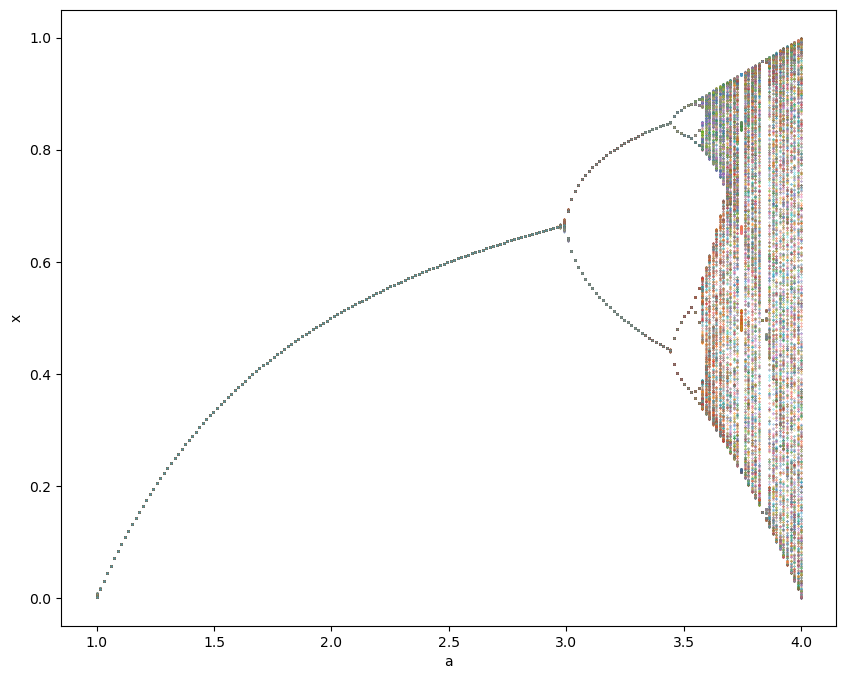

In [20]:
n = 200  # points in a
a = np.linspace(1, 4, n)
s = 1000  # steps for each a
x = np.zeros((n, s+1))
for i, ai in enumerate(a):
    x[i] = iterate(logistic, 0.1, ai, s)
plt.figure(figsize=(10, 8))
plt.plot(a, x[:,100:], '.', markersize=0.5)
plt.xlabel('a')
plt.ylabel('x');

## 3. Recursive call and fractal

Draw the Sherpinski gasket as below.

![shelpinski](figures/shelpinski.png)

In [21]:
def shelpinsky(x0=0, x1=1, y=0, e=1e-2):
    """draw a Shelpinsky gasket
    x0, x1: left, right corners
    y: base height
    a: fraction to fill
    e: minimal resolution"""
    u = x1 - x0  # size
    if abs(u) < e:
        plt.plot([x0, x0+u/2, x1, x0], [y, y+u*np.sqrt(3)/2, y, y], lw=0.2)  # triangle
    else:
        shelpinsky(x0, x0+u/2, y, e)
        shelpinsky(x0+u/4, x1-u/4, y+u*np.sqrt(3)/4, e)
        shelpinsky(x0+u/2, x1, y, e)
    plt.axis('equal');

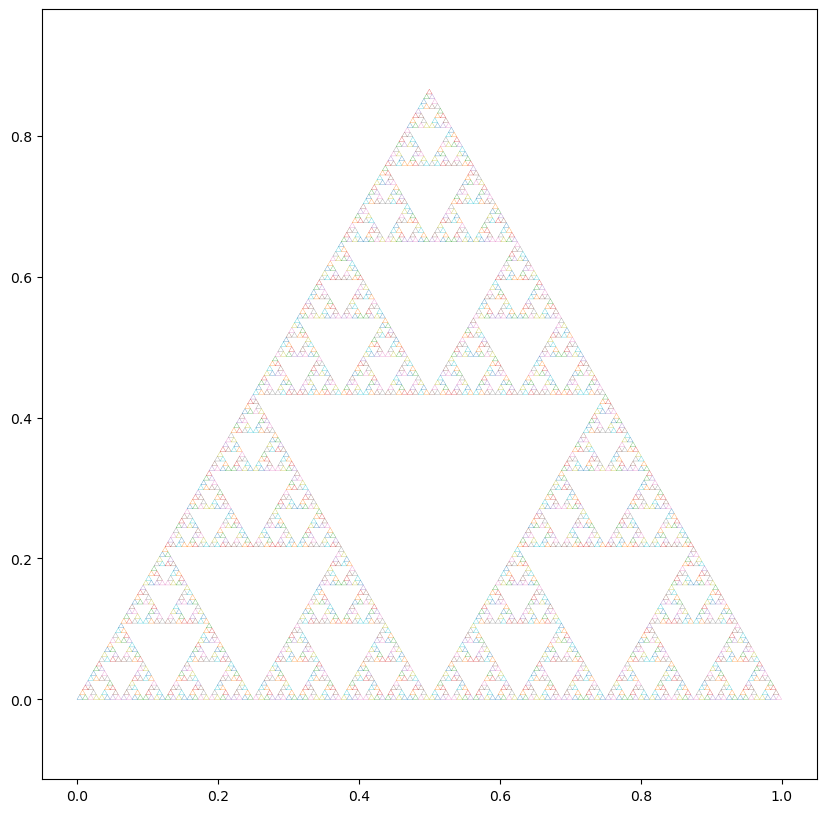

In [22]:
plt.figure(figsize=(10,10))
shelpinsky()